In [1]:
from src.IntModP import IntModP
from src.CurvePoint import CurvePoint
from src.EllipticCurve import EllipticCurve


from src.Emitter import Emitter
from src.Receiver import Receiver
from src.LogDiscret import LogDiscret


from src.utils import initPublic, primeFactors

In [2]:
IntModP.p = 23
a = 1
b = 12

In [3]:
E = EllipticCurve(a, b)
print(E)

y^2 = x^3 + 1 [23]x + 12 [23]


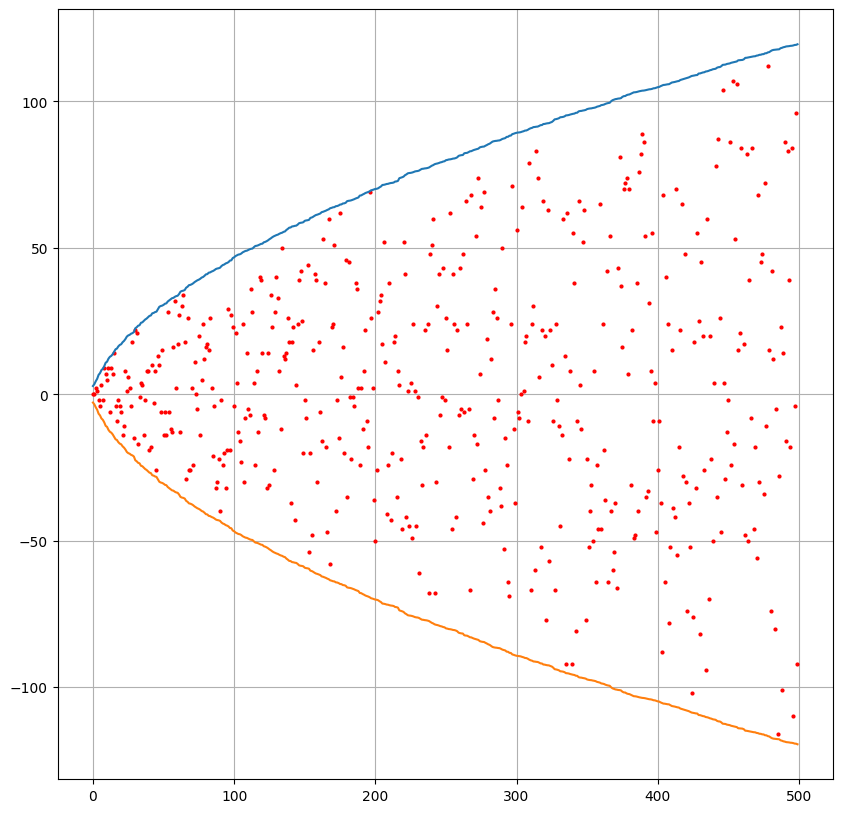

In [4]:
E.test_hasse()

In [ ]:
E.createPoints(13)
print(len(E.points))
# P = E.getGeneratorPoint(15)
# P = E.getPointOfOrder(5)
# print(P)
# print(P.order())

18


In [ ]:
Q = 3492*P
print(Q)

Point de E(Z/40009Z) : (32026 [40009], 8178 [40009])


In [ ]:
L = LogDiscret()
L.baby_step_giant_step(P, Q)

3492

In [ ]:
L.rho_pollard(P, Q)

3492

In [ ]:
for i in range(P.o):
	assert L.rho_pollard(P, i*P)==i
	assert L.baby_step_giant_step(P, i*P)==i

AssertionError: 

In [ ]:
# p     , a  , b  --> #E(Fp) --> (xp, yp   , ordre )   (tps pour récupérer tous les points de E, tps pour trouver un élément d'ordre q)
# 7879  , 7  , 8  --> 7944   --> (13, 2232 , 3972  )   (1m46 / 1s)  --> 25s
# 10007 , 121, 42 --> 10047  --> (2 , 819  , 10047 )   (2m56  / 1s) --> 40.7s
# 15013 , 121, 42 --> 14968  --> (0 , 5394 , 7484  )   (6m43  / 1s)
# 20011 , 121, 42 --> 20016  --> (13, 2691 , 20016 )   (11m52 / 3s)
# 40009 , 121, 42 --> 40354  --> (9 , 10554, 40354 )   (45m35 / 8s)
# 100003, 121, 42 --> 100413 --> (1 , 7583 , 100413)   (307m  / 5s)


### Génération de courbes et temps d'exécutions
|    $p$   	| $a$ 	| $b$ 	| $\#E(F_p)$ 	|  $(x_P, y_P)$ 	|  $P.o$  	| `EllipticCurve(a, b)` |     `getGeneratorPoint()` 	|
|:--------:	|:---:	|:---:	|:----------:	|:-------------:	|:------:	|:-------------------:	|:-------------------------:	|
|  $7879$  	|  7  	|  8  	|    7944    	|  $(13, 2232)$ 	|  3972  	|        25s        	|            1.3s            	|
|  $10007$ 	| 121 	|  42 	|    10047   	|  $(2 , 819)$  	|  10047 	|        39.6s        	|            0.5s              	|
|  $15013$ 	| 121 	|  42 	|    14968   	|  $(0 , 5394)$ 	|  7484  	|        1m28          	|            0.5s              	|
|  $20011$ 	| 121 	|  42 	|    20016   	|  $(13, 2691)$ 	|  20016 	|        2m41          	|            2.9s             	|
|  $40009$ 	| 121 	|  42 	|    40354   	|  $(9 , 10554)$ 	|  40354 	|        11m8          	|            8.1s             	|
|$100\ 003$	| 121 	|  42 	|   100413   	|  $(1 , 7583)$ 	|  100413 	|        70m           	|            4.1s             	|